In [1]:
import csv
import pandas as pd
import os
import glob
encoding = 'SHIFT_JIS'
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

In [ ]:
file_name = "/content/62603.csv"
encoding = 'SHIFT_JIS'
glass_t = 0.5

# CSVファイルをDataFrameとして読み込む
df = pd.read_csv(file_name, encoding=encoding, skiprows=15)
df = df.drop(df.columns[0], axis=1)
df = df.drop(df.columns[-1], axis=1)

df = df - glass_t
#df[df < 0] = 0.0
df.to_csv(file_name+'(a).csv', index=False)

## データ変更

In [60]:
file_name = "/content/62602.csv" # @param {type:"string"}
t = 0.5 # @param {type:"number"}
w = 0.003 # @param {type:"number"}

df = pd.read_csv(file_name, encoding=encoding, skiprows=15)
df = df.drop(df.columns[0], axis=1)
df = df.drop(df.columns[-1], axis=1)
df = round(df - t,5)

m = df.median().median()
df[(df >= m-w) & (df <= m+w)] = m
sf = ((df >= m-w) & (df <= m+w)).sum().sum()
sa = round(sf/(df <= 1).sum().sum(),5)
df.to_csv(file_name+'(z).csv', index=False)
print(m,sf,sa)

0.11005 14755 0.8598


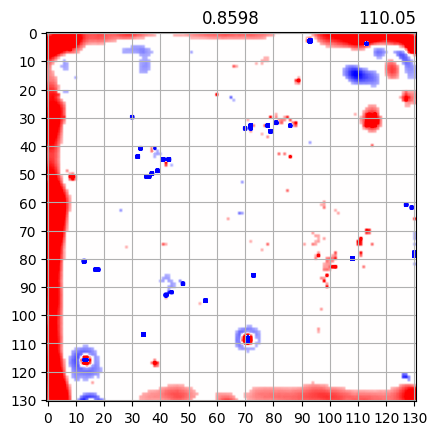

In [61]:
max = 0.01 # @param {type:"number"}
norm = mcolors.Normalize(vmin=m-max, vmax=m+max)
#norm = mcolors.Normalize(vmin=df.min().min(), vmax=df.max().max())
cmap = plt.get_cmap('bwr')

fig, ax = plt.subplots()
im = ax.imshow(df, cmap=cmap, norm=norm)
ax.set_xticks(np.arange(0, 131, step=10))
ax.set_yticks(np.arange(0, 131, step=10))
ax.set_title(m*1000, loc='right')
#ax.set_title( file_name, loc='left')
ax.set_title(sa, loc='center')
ax.grid()
#ax.set_xlim(-65,65)
#ax.set_ylim(-65, 65)
#fig.colorbar(im)
plt.show()